把加速度從手機座標系轉換成世界坐標系

In [ ]:
import openpyxl
from openpyxl.styles import Font 
import os
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

folder = '/0427/0427-3'
acc_xl = openpyxl.load_workbook('/content/drive/MyDrive/paper/' + folder + '/Accelerometer.xlsx')
ori_xl = openpyxl.load_workbook('/content/drive/MyDrive/paper/' + folder + '/Orientation.xlsx')

In [ ]:
acc_sheet = acc_xl.worksheets[0]
ori_sheet = ori_xl.worksheets[0]

acc_x = np.zeros(acc_sheet.max_row - 1, dtype=float)
acc_y = np.zeros(acc_sheet.max_row - 1, dtype=float)
acc_z = np.zeros(acc_sheet.max_row - 1, dtype=float)
roll = np.zeros(ori_sheet.max_row - 1, dtype=float)
pitch = np.zeros(ori_sheet.max_row - 1, dtype=float)
yaw = np.zeros(ori_sheet.max_row - 1, dtype=float)
q1 = np.zeros(ori_sheet.max_row - 1, dtype=float) #qx
q2 = np.zeros(ori_sheet.max_row - 1, dtype=float) #qy
q3 = np.zeros(ori_sheet.max_row - 1, dtype=float) #qz
q0 = np.zeros(ori_sheet.max_row - 1, dtype=float) #qw

#使用for loop掃描
for rowNum in range(2, acc_sheet.max_row + 1, 1):
  acc_x[rowNum - 2] = acc_sheet.cell(rowNum, 5).value
  acc_y[rowNum - 2] = acc_sheet.cell(rowNum, 4).value
  acc_z[rowNum - 2] = acc_sheet.cell(rowNum, 3).value

for rowNum in range(2, ori_sheet.max_row + 1, 1):
  roll[rowNum - 2] = ori_sheet.cell(rowNum, 7).value
  pitch[rowNum - 2] = ori_sheet.cell(rowNum, 8).value
  yaw[rowNum - 2] = ori_sheet.cell(rowNum, 9).value
  q1[rowNum - 2] = ori_sheet.cell(rowNum, 5).value
  q2[rowNum - 2] = ori_sheet.cell(rowNum, 4).value
  q3[rowNum - 2] = ori_sheet.cell(rowNum, 3).value
  q0[rowNum - 2] = ori_sheet.cell(rowNum, 6).value


In [ ]:
import math

#rotation_Euler = np.zeros((3,3))
rotation_Euler_x = np.zeros((3,3))
rotation_Euler_y = np.zeros((3,3))
rotation_Euler_z = np.zeros((3,3))
acc_SCS = np.zeros(3)
acc_Euler_ECS = np.zeros(3)
acc_Euler_ECS_all = np.zeros(acc_sheet.max_row - 1, dtype=float)
  
for i in range(0, ori_sheet.max_row - 1, 1):
  rotation_Euler_x[0][0] = 1
  rotation_Euler_x[1][1] = math.cos(roll[i])
  rotation_Euler_x[1][2] = -math.sin(roll[i])
  rotation_Euler_x[2][1] = math.sin(roll[i])
  rotation_Euler_x[2][2] = math.cos(roll[i])

  rotation_Euler_y[0][0] = math.cos(pitch[i])
  rotation_Euler_y[0][2] = math.sin(pitch[i])
  rotation_Euler_y[1][1] = 1
  rotation_Euler_y[2][0] = -math.sin(pitch[i])
  rotation_Euler_y[2][2] = math.cos(pitch[i])

  rotation_Euler_z[0][0] = math.cos(yaw[i])
  rotation_Euler_z[0][1] = -math.sin(yaw[i])
  rotation_Euler_z[1][1] = math.sin(yaw[i])
  rotation_Euler_z[1][2] = math.cos(yaw[i])
  rotation_Euler_z[2][2] = 1

  rotation_Euler = np.dot(rotation_Euler_z, rotation_Euler_y, rotation_Euler_x)
  #print(rotation)

  acc_SCS[0] = acc_x[i]
  acc_SCS[1] = acc_y[i]
  acc_SCS[2] = acc_z[i]

  acc_Euler_ECS = np.dot(rotation_Euler, acc_SCS)

  acc_sheet.cell(i + 2, 6).value = acc_Euler_ECS[0]
  acc_sheet.cell(i + 2, 7).value = acc_Euler_ECS[1]
  acc_sheet.cell(i + 2, 8).value = acc_Euler_ECS[2]
  acc_sheet.cell(i + 2, 12).value = i
  acc_sheet.cell(i + 2, 13).value = roll[i]
  acc_sheet.cell(i + 2, 14).value = pitch[i]
  acc_sheet.cell(i + 2, 15).value = yaw[i]

  acc_Euler_ECS_all[i] = acc_Euler_ECS[2]

In [ ]:
rotation_quaternion = np.zeros((3,3))
acc_SCS = np.zeros(3)
acc_quaternion_ECS = np.zeros(3)
acc_quaternion_ECS_all = np.zeros(acc_sheet.max_row - 1, dtype=float)

for i in range(0, ori_sheet.max_row - 1, 1):

  # rotation_quaternion = ([[1-2*q2[i]*q2[i]*-2*q3[i]*q3[i], 2*q1[i]*q2[i]-2*q0[i]*q3[i], 2*q1[i]*q3[i]+2*q0[i]*q2[i]], 
  #                        [2*q1[i]*q2[i]+2*q0[i]*q3[i], 1-2*q1[i]*q1[i]-2*q3[i]*q3[i], 2*q2[i]*q3[i]-2*q0[i]*q1[i]], 
  #                        [2*q1[i]*q3[i]-2*q0[i]*q2[i], 2*q2[i]*q3[i]+2*q0[i]*q1[i], 1-2*q1[i]*q1[i]-2*q2[i]*q2[i]]])
  rotation_quaternion = ([[q0[i]*q0[i]+q1[i]*q1[i]-q2[i]*q2[i]-q3[i]*q3[i], 2*q1[i]*q2[i]-2*q0[i]*q3[i], 2*q1[i]*q3[i]+2*q0[i]*q2[i]], 
                          [2*q1[i]*q2[i]+2*q0[i]*q3[i], q0[i]*q0[i]-q1[i]*q1[i]+q2[i]*q2[i]-q3[i]*q3[i], 2*q2[i]*q3[i]-2*q0[i]*q1[i]], 
                          [2*q1[i]*q3[i]-2*q0[i]*q2[i], 2*q2[i]*q3[i]+2*q0[i]*q1[i], q0[i]*q0[i]-q1[i]*q1[i]-q2[i]*q2[i]+q3[i]*q3[i]]])
  acc_SCS[0] = acc_x[i]
  acc_SCS[1] = acc_y[i]
  acc_SCS[2] = acc_z[i]

  acc_quaternion_ECS = np.dot(rotation_quaternion, acc_SCS)
  #print(acc_EulerECS)
  #if i < 27:
    #print(rotation_quaternion)

  acc_sheet.cell(i + 2, 9).value = acc_quaternion_ECS[0]
  acc_sheet.cell(i + 2, 10).value = acc_quaternion_ECS[1]
  acc_sheet.cell(i + 2, 11).value = acc_quaternion_ECS[2]
  acc_sheet.cell(i + 2, 19).value = q0[i]
  acc_sheet.cell(i + 2, 18).value = q1[i]
  acc_sheet.cell(i + 2, 17).value = q2[i]
  acc_sheet.cell(i + 2, 16).value = q3[i]

  acc_quaternion_ECS_all[i] = acc_quaternion_ECS[2]

In [ ]:
acc_sheet.cell(1, 6).value = 'Euler_x'
acc_sheet.cell(1, 7).value = 'Euler_y'
acc_sheet.cell(1, 8).value = 'Euler_z'
acc_sheet.cell(1, 9).value = 'quaternion_x'
acc_sheet.cell(1, 10).value = 'quaternion_y'
acc_sheet.cell(1, 11).value = 'quaternion_z'
acc_sheet.cell(1, 12).value = 'index'
acc_sheet.cell(1, 13).value = 'roll'
acc_sheet.cell(1, 14).value = 'pitch'
acc_sheet.cell(1, 15).value = 'yaw'
acc_sheet.cell(1, 19).value = 'q0'
acc_sheet.cell(1, 18).value = 'q1'
acc_sheet.cell(1, 17).value = 'q2'
acc_sheet.cell(1, 16).value = 'q3'
acc_xl.save('/content/drive/MyDrive/paper/' + folder + '/Accelerometer_ECS.xlsx')

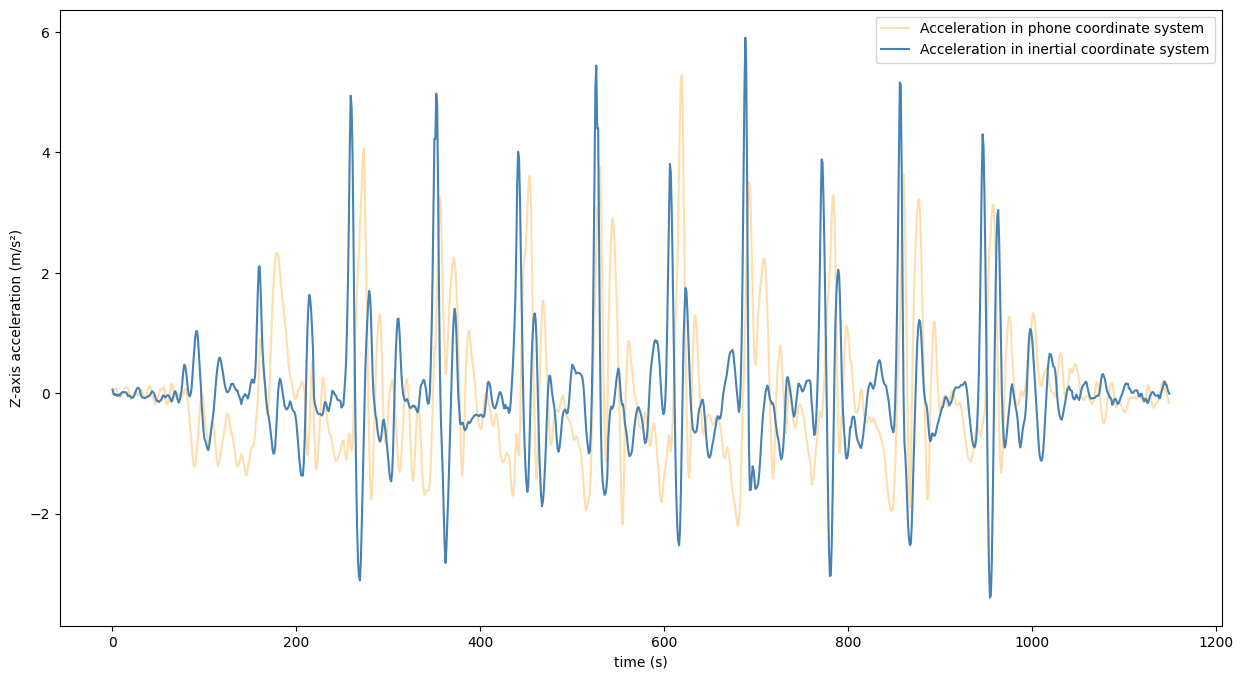

In [ ]:
plt.figure(figsize=(15, 8))
# plt.title("Index: " + str(idx) + ", step: " + str(step_count))
plt.xlabel("time (s)")
plt.ylabel("Z-axis acceleration (m/s²)")
plt.plot(acc_z[13500:14650], color = 'navajowhite', label = 'Acceleration in phone coordinate system')
plt.plot(acc_quaternion_ECS_all[13500:14650], color = 'steelblue', label = 'Acceleration in inertial coordinate system')
plt.legend()